In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_regression, make_classification

import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)
df = pd.read_csv(r'..\data\processed\combined_metab_lipid_table.csv', index_col=0)
data_cols = df.filter(regex='FBG|RBG').columns
pval_cols = df.filter(regex='pval').columns

In [115]:
df.loc[df['Tracefinder ID'].notna()]

,Type,i,Proposed ID,Tracefinder ID,Lipid Class,m/z,RT [min],Area (Max.),Score,Adduct,...,1092_10_FBG,1082_8_RBG,1062_8_RBG,1102_10_FBG,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG
Unique ID,,,,,,,,,,,,,,,,,,,,,
Glutamine_147.07649_12.646,metabolite,m_34,Glutamine,Glutamine,NaN,147.07649,12.646,28.193496,Tracefinder confirmed,[M+NH4]+1,...,26.882639,26.925430,26.867163,27.000436,26.901815,26.936708,26.973050,26.842004,27.195951,26.463891
Acetyl-L-carnitine_204.12313_8.718,metabolite,m_70,Acetyl-L-carnitine,Acetyl-L-carnitine,NaN,204.12313,8.718,27.142054,Tracefinder confirmed,[M+H]+1,...,26.822648,25.239308,25.496252,26.636249,25.720754,26.583907,25.119047,25.964098,25.458350,25.241586
Leucine/Isoleucine_130.08623_9.018,metabolite,m_88,Leucine/Isoleucine,Leucine/Isoleucine,NaN,130.08623,9.018,26.683899,Tracefinder confirmed,[M-H]-1,...,24.820474,26.458058,26.131341,24.335208,24.704855,24.794575,26.320944,25.794918,25.298861,24.028179
Leucine/Isoleucine_130.08623_9.295,metabolite,m_125,Leucine/Isoleucine,Leucine/Isoleucine,NaN,130.08623,9.295,25.969738,Tracefinder confirmed,[M-H]-1,...,24.171204,25.030563,25.374058,23.693359,24.021552,23.901612,25.898913,25.061075,24.684368,23.059312
Proline_116.07057_10.182,metabolite,m_134,Proline,Proline,NaN,116.07057,10.182,25.835436,Tracefinder confirmed,[M-H]-1,...,24.046026,25.162700,25.346057,23.723069,23.965398,23.885817,25.651946,25.162568,24.762445,22.945515
Carnitine_162.11253_10.537,metabolite,m_137,Carnitine,Carnitine,NaN,162.11253,10.537,25.787099,Tracefinder confirmed,[M+H]+1,...,24.564031,25.341415,25.207490,25.066112,25.428989,24.697697,25.049017,24.865296,25.772814,24.755332
Threonine_118.04984_12.041,metabolite,m_167,Threonine,Threonine,NaN,118.04984,12.041,25.516571,Tracefinder confirmed,[M-H]-1,...,23.955628,25.058743,25.070972,23.587393,24.246313,24.208220,25.166207,24.911704,24.928918,24.113325
L-Alanine_88.0393_11.941,metabolite,m_186,L-Alanine,L-Alanine,NaN,88.03930,11.941,25.311436,Tracefinder confirmed,[M-H]-1,...,24.175540,24.742082,24.704308,24.310216,24.449803,24.333807,24.871061,24.399121,24.713817,23.960512
L-Phenylalanine_164.07068_8.988,metabolite,m_193,L-Phenylalanine,L-Phenylalanine,NaN,164.07068,8.988,25.219996,Tracefinder confirmed,[M-H]-1,...,24.032956,24.285669,24.428983,23.668128,23.632884,23.947053,24.586971,24.070691,24.033017,22.825002


In [114]:
df.loc[(df['Proposed ID'] != 'unknown') & (df['Type'] == 'lipid')]

,Type,i,Proposed ID,Tracefinder ID,Lipid Class,m/z,RT [min],Area (Max.),Score,Adduct,...,1092_10_FBG,1082_8_RBG,1062_8_RBG,1102_10_FBG,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG
Unique ID,,,,,,,,,,,,,,,,,,,,,
LysoPC_20:5_542.32452_1.036,lipid,l_59,LysoPC 20:5,NaN,LysoPC,542.32452,1.036,27.240025,NaN,NaN,...,26.219155,25.525564,26.130162,25.538301,24.531729,24.893138,26.422086,26.375037,25.859763,25.688053
LysoPC_18:1_522.35236_1.137,lipid,l_62,LysoPC 18:1,NaN,LysoPC,522.35236,1.137,24.057255,NaN,NaN,...,21.712410,22.562429,22.641485,21.889492,21.926470,21.358820,22.732770,23.127453,22.839920,21.983506
LysoPC_22:5_570.35516_1.417,lipid,l_66,LysoPC 22:5,NaN,LysoPC,570.35516,1.417,23.297861,NaN,NaN,...,21.342465,21.738154,22.431803,22.502464,21.134994,21.414575,22.327534,22.236230,22.083478,21.822266
LysoPC_17:1_508.3407_1.452,lipid,l_68,LysoPC 17:1,NaN,LysoPC,508.34070,1.452,22.132391,NaN,NaN,...,20.066602,20.649982,20.888983,20.082215,19.977858,20.085441,21.011768,20.645696,21.202782,21.098831
LysoPC_16:0_496.34018_1.489,lipid,l_69,LysoPC 16:0,NaN,LysoPC,496.34018,1.489,29.720795,NaN,NaN,...,26.055671,28.262312,27.693168,28.313253,25.657907,27.999821,27.908307,27.707524,28.304917,27.936891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TG_57:2_946.88043_19.582,lipid,l_1015,TG 57:2,NaN,TG,946.88043,19.582,22.430427,NaN,NaN,...,17.419639,19.687661,20.102754,19.586094,18.438757,18.380746,19.429230,15.554904,18.636955,18.058207
TG_56:1_934.88123_19.841,lipid,l_1017,TG 56:1,NaN,TG,934.88123,19.841,24.103360,NaN,NaN,...,18.410442,21.850629,21.292289,20.472106,19.977209,18.951939,20.671684,18.786307,20.341064,19.633313
TG_18:2_18:1_24:0_986.91193_19.865,lipid,l_1018,TG 18:2_18:1_24:0,NaN,TG,986.91193,19.865,23.177965,NaN,NaN,...,16.192832,20.801552,20.792317,18.888741,19.021104,18.923841,20.157571,17.758451,19.452930,18.579997


In [3]:
animal_phenotypes

,animal,Date of birth,lcms_sampled,glucose_tolerance,10.6g dextrose in 6mL distilled water; total 12.5mL solution,OGTT(10min),OGTT(20min),OGTT(30min),OGTT(60min),OGTT(120min),OGTT (AUC),HbA1c,Interscapular brown fat (g),BF (%BW),Inguinal white fat one side (g),WF (%BW),BF/WF,Plasma,Fatty liver,Notes
0,1060,2021-01-23,True,impaired,58.5,178.0,314.5,551.0,589.0,200.0,1761.75,NaN,2.0448,1.945576,0.7185,0.683635,2.845929,murky,No,NaN
1,1061,2021-01-23,False,NaN,48.0,196.5,344.5,449.5,518.0,284.5,1674.80,NaN,1.7808,1.751032,0.6059,0.595772,2.939099,murky,Slight,NaN
2,1062,2021-01-23,True,impaired,56.5,219.0,334.0,462.0,511.0,189.0,1648.75,NaN,2.5185,2.308433,0.7439,0.681852,3.385536,murky,No,NaN
3,1063,2021-01-23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5485,2.333791,0.8614,0.788828,2.958556,NaN,No,OGTT failed Didn't collect tissue or post-OGTT...
4,1074,2021-01-23,True,impaired,38.5,160.0,308.0,368.0,445.5,99.0,1350.25,NaN,2.5060,2.269928,0.7164,0.648913,3.498046,murky,Slight,NaN
5,1075,2021-01-23,False,NaN,169.0,355.0,600.0,600.0,569.5,392.0,3365.00,NaN,1.3107,1.242370,0.5910,0.560190,2.217766,White,Yes,NaN
6,1076,2021-01-23,True,diabetic,138.0,352.5,513.5,585.0,600.0,406.5,2321.25,NaN,1.4332,1.278501,0.6960,0.620874,2.059195,White,Slight,NaN
7,1080,2021-01-24,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9369,1.727832,0.7754,0.691704,2.497937,NaN,No,OGTT failed Didn't collect tissue or post-OGTT...
8,1081,2021-01-24,False,NaN,171.0,345.0,547.0,600.0,563.0,428.5,2354.75,NaN,1.3511,1.193551,0.6283,0.555035,2.150406,White,No,NaN
9,1082,2021-01-24,True,diabetic,62.0,258.0,600.0,600.0,571.5,328.5,2224.75,NaN,0.8904,0.818382,0.6515,0.598805,1.366692,White,Yes,NaN


## Perform 3 experiments
1. RF classification (N/I/D) with all features
1. RF classification (N/I/D) with only features that converged under full model
2. RF classification (N/I/D) with only features significant under glucose tolerance and glucose tolerance x sampling

## Hypothesis: RF is robust to non-informative features, so leave-one-out CV will show all 3 models perform approximately the same



In [4]:
# Generate data labels (y) for RF Classifier 

y = fg.set_index('combined_col_name')[['glucose_tolerance']]
y['glucose_tolerance'] = y['glucose_tolerance'].map({'normal': 0, 'impaired': 1, 'diabetic': 2})
y

y_continuous = fg.set_index('combined_col_name')['bg']

### 1) RF classifier with all features

In [5]:
X_all = df[data_cols].T
X_all

Unique ID,unknown_141.01586_16.616,Linoleic Acid_279.23234_1.591,unknown_496.33981_2.597,trans-Petroselinic acid_281.24793_1.568,Uric acid_167.02007_12.732,unknown_520.33987_2.534,unknown_255.23236_1.62,unknown_268.99842_16.592,unknown_524.37116_2.337,unknown_187.00615_2.593,...,unknown_1027.93848_19.865,TG_58:2_960.89709_19.876,unknown_1001.92316_19.882,TG_18:0_18:0_18:0_908.86542_19.885,unknown_948.89648_20.144,unknown_897.82532_20.148,unknown_974.9118_20.163,unknown_593.58716_20.175,unknown_871.80945_20.196,unknown_1003.93829_20.435
1076_10_FBG,29.163795,30.152274,29.735454,29.701370,26.700629,28.721319,29.803012,29.047350,28.892166,27.170732,...,17.215913,18.378388,18.336840,18.447194,16.419472,18.897008,16.810111,17.724121,18.400646,16.655211
1062_8_FBG,30.572489,30.703658,29.569621,30.641931,21.774699,27.427681,30.349551,28.813080,28.671019,26.901321,...,16.652292,17.166214,17.882779,19.507955,17.567143,19.348489,17.364343,19.240306,18.585339,16.313637
1093_9_FBG,29.753802,30.603359,30.043032,30.624242,27.051667,28.906704,30.228474,29.137348,28.609728,26.578356,...,19.686602,21.175953,20.788956,21.407793,21.111930,21.529536,20.099612,21.430516,20.968101,19.339229
1060_8_RBG,30.610134,29.309067,29.827946,28.459047,17.431244,29.295561,29.113441,28.848762,28.995708,22.512901,...,18.212006,20.310682,19.423127,20.589383,18.430226,17.921098,18.430542,17.488155,16.202162,17.985491
1091_10_FBG,30.700893,30.505310,29.420633,30.636897,27.163433,28.470314,30.188475,28.977544,28.105805,26.149719,...,17.032234,17.710758,18.448910,19.899861,18.266873,20.133479,17.986741,19.996615,19.778245,17.357845
1092_9_RBG,30.577914,29.114748,29.483693,28.588431,25.867137,29.644309,29.046819,28.993620,28.339876,22.618105,...,17.645873,18.375462,18.748319,19.968825,18.419951,17.824376,18.099621,17.383197,15.556400,17.582655
1093_10_RBG,30.656929,29.416945,29.886091,28.685024,26.188412,29.792770,29.130352,29.043613,28.603652,22.397004,...,18.320528,18.989137,19.227975,20.089886,18.323302,18.836779,18.145468,18.282680,16.603878,17.887551
1082_10_FBG,30.604336,30.081204,29.609038,30.257619,26.977695,28.204534,29.891213,28.981538,28.704319,27.005622,...,13.960868,16.566651,15.513664,18.843156,15.364329,19.255315,14.496938,19.507853,19.379093,13.846921
1060_9_RBG,30.996475,29.431175,30.018239,28.625995,26.312933,30.211206,29.212933,29.416956,29.331185,22.829664,...,18.340561,19.661018,19.568500,20.581856,18.948519,18.261890,18.854601,17.718258,16.494586,18.466842
1101_9_FBG,30.672859,30.044828,29.620839,29.974868,26.709748,28.574011,29.729036,29.041379,28.488075,26.715388,...,18.237433,19.419490,19.099508,20.166937,19.286479,19.685160,18.324624,19.526233,18.844052,17.739443


In [6]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=1, random_state=100)
n_scores = cross_val_score(estimator=rfc,
                           X=X_all,
                           y=y,
                           cv=cv,
                           scoring='accuracy', 
                           n_jobs=-1,
                           error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.700 (0.100)


### 2) RF classifier with only features that converged under full model

In [7]:
X_only_conv = df.loc[~df[pval_cols].isna().all(axis=1), data_cols].T
X_only_conv

Unique ID,unknown_141.01586_16.616,Linoleic Acid_279.23234_1.591,unknown_496.33981_2.597,trans-Petroselinic acid_281.24793_1.568,Uric acid_167.02007_12.732,unknown_520.33987_2.534,unknown_255.23236_1.62,unknown_268.99842_16.592,unknown_524.37116_2.337,unknown_187.00615_2.593,...,TG_18:2_18:1_24:0_986.91193_19.865,unknown_1027.93848_19.865,TG_58:2_960.89709_19.876,unknown_1001.92316_19.882,TG_18:0_18:0_18:0_908.86542_19.885,unknown_948.89648_20.144,unknown_897.82532_20.148,unknown_974.9118_20.163,unknown_871.80945_20.196,unknown_1003.93829_20.435
1076_10_FBG,29.163795,30.152274,29.735454,29.701370,26.700629,28.721319,29.803012,29.047350,28.892166,27.170732,...,17.330527,17.215913,18.378388,18.336840,18.447194,16.419472,18.897008,16.810111,18.400646,16.655211
1062_8_FBG,30.572489,30.703658,29.569621,30.641931,21.774699,27.427681,30.349551,28.813080,28.671019,26.901321,...,17.634751,16.652292,17.166214,17.882779,19.507955,17.567143,19.348489,17.364343,18.585339,16.313637
1093_9_FBG,29.753802,30.603359,30.043032,30.624242,27.051667,28.906704,30.228474,29.137348,28.609728,26.578356,...,20.504554,19.686602,21.175953,20.788956,21.407793,21.111930,21.529536,20.099612,20.968101,19.339229
1060_8_RBG,30.610134,29.309067,29.827946,28.459047,17.431244,29.295561,29.113441,28.848762,28.995708,22.512901,...,19.499073,18.212006,20.310682,19.423127,20.589383,18.430226,17.921098,18.430542,16.202162,17.985491
1091_10_FBG,30.700893,30.505310,29.420633,30.636897,27.163433,28.470314,30.188475,28.977544,28.105805,26.149719,...,18.058011,17.032234,17.710758,18.448910,19.899861,18.266873,20.133479,17.986741,19.778245,17.357845
1092_9_RBG,30.577914,29.114748,29.483693,28.588431,25.867137,29.644309,29.046819,28.993620,28.339876,22.618105,...,18.825216,17.645873,18.375462,18.748319,19.968825,18.419951,17.824376,18.099621,15.556400,17.582655
1093_10_RBG,30.656929,29.416945,29.886091,28.685024,26.188412,29.792770,29.130352,29.043613,28.603652,22.397004,...,19.339697,18.320528,18.989137,19.227975,20.089886,18.323302,18.836779,18.145468,16.603878,17.887551
1082_10_FBG,30.604336,30.081204,29.609038,30.257619,26.977695,28.204534,29.891213,28.981538,28.704319,27.005622,...,15.799069,13.960868,16.566651,15.513664,18.843156,15.364329,19.255315,14.496938,19.379093,13.846921
1060_9_RBG,30.996475,29.431175,30.018239,28.625995,26.312933,30.211206,29.212933,29.416956,29.331185,22.829664,...,19.624631,18.340561,19.661018,19.568500,20.581856,18.948519,18.261890,18.854601,16.494586,18.466842
1101_9_FBG,30.672859,30.044828,29.620839,29.974868,26.709748,28.574011,29.729036,29.041379,28.488075,26.715388,...,19.243350,18.237433,19.419490,19.099508,20.166937,19.286479,19.685160,18.324624,18.844052,17.739443


In [8]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=1, random_state=100)
n_scores = cross_val_score(estimator=rfc,
                           X=X_only_conv,
                           y=y,
                           cv=cv,
                           scoring='accuracy', 
                           n_jobs=-1,
                           error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.750 (0.144)


### 3) RF classification (N/I/D) with only features significant under glucose tolerance and glucose tolerance interaction with sampling (gluc_tol x feeding)

In [9]:
gluc_tol_cols = ['fdr corrected pval effect of glucose tolerance', 
                 'fdr corrected pval effect of interaction sampling and glucose tolerance']
X_only_signf = df.loc[(df[gluc_tol_cols] < 0.05).any(axis=1), data_cols].T

In [10]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=100)
n_scores = cross_val_score(estimator=rfc,
                           X=X_only_signf,
                           y=y,
                           cv=cv,
                           scoring='accuracy', 
                           n_jobs=-1,
                           error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.700 (0.135)


In [11]:
n_scores

array([0.66666667, 0.66666667, 0.83333333, 0.5       , 0.83333333,
       0.83333333, 0.5       , 0.5       , 0.66666667, 0.66666667,
       0.83333333, 0.66666667, 0.66666667, 0.66666667, 0.83333333,
       0.66666667, 0.66666667, 1.        , 0.83333333, 0.5       ])

## Another experiment:
2. RF with indicator variable {0, 1} for FBG/RBG in training data 

## Hypothesis: mild increase in accuracy. 

In [12]:
sampling_indicator_var = fg.set_index('combined_col_name')['bg_type'].map({'FBG': 0, 'RBG': 1})

In [13]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=5, random_state=100)
n_scores = cross_val_score(estimator=rfc, X=X_all.join(sampling_indicator_var), y=y, cv=cv,
                           scoring='accuracy', n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.687 (0.177)


In [40]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=5, random_state=100)
n_scores = cross_val_score(estimator=rfc, X=X_only_conv.join(sampling_indicator_var), y=y, cv=cv,
                           scoring='accuracy', n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.710 (0.165)


([<matplotlib.axis.XTick at 0x234ff095a88>,
 [Text(0.1, 0, '20'),
  Text(1.1, 0, '40'),
  Text(2.1, 0, '60'),
  Text(3.1, 0, '80'),
  Text(4.1, 0, '100')])

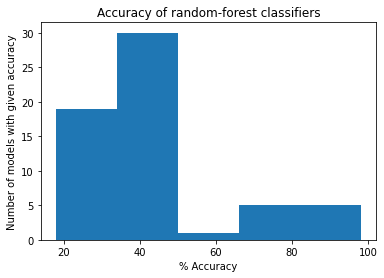

In [67]:
plt.hist([str(x) for x in n_scores*100], bins=5)
plt.title('Accuracy of random-forest classifiers')
plt.xlabel('% Accuracy')
plt.ylabel('Number of models with given accuracy')
plt.xticks(ticks=[0.1 + x for x in[0, 1, 2, 3, 4]], labels=[20, 40, 60, 80, 100])

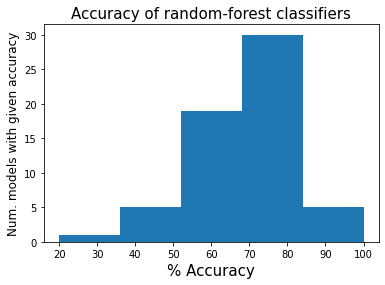

In [75]:
plt.hist(n_scores*100, bins=5)
plt.title('Accuracy of random-forest classifiers', fontsize=15)
plt.xlabel('% Accuracy', fontsize=15)
plt.ylabel('Num. models with given accuracy', fontsize=12)
# plt.xticks(ticks=[0.1 + x for x in[0, 1, 2, 3, 4]], labels=[20, 40, 60, 80, 100])
plt.savefig(r'..\reports\figures\3-5-2\RF_classifier_accuracy.png')

In [74]:
np.mean(n_scores)

0.7099999999999999

In [15]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=3, random_state=100)
n_scores = cross_val_score(estimator=rfc, X=X_only_signf.join(sampling_indicator_var), y=y, cv=cv,
                           scoring='accuracy', n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.703 (0.173)


(array([ 9.,  0.,  0., 17.,  0.,  0., 28.,  0.,  0.,  6.]),
 array([0.4 , 0.46, 0.52, 0.58, 0.64, 0.7 , 0.76, 0.82, 0.88, 0.94, 1.  ]),
 <BarContainer object of 10 artists>)

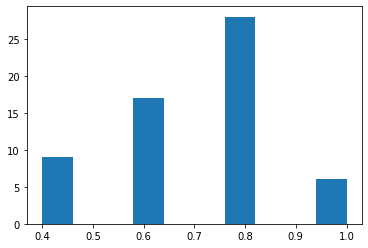

In [16]:
plt.hist(n_scores)

## RF Regressor

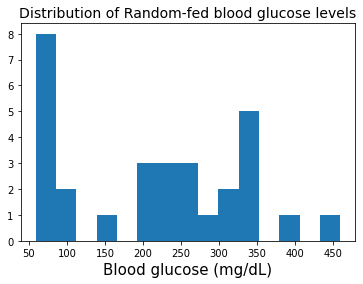

In [83]:
plt.hist(y_continuous[y_continuous.index.str.contains('RBG')], bins=15)
plt.title('Distribution of Random-fed blood glucose levels', fontsize=14)
plt.xlabel('Blood glucose (mg/dL)', fontsize=15)
plt.savefig(r'..\reports\figures\3-5-2\random_fed_blood_gluc_distribution.png')

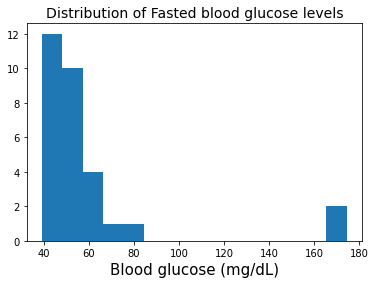

In [84]:
plt.hist(y_continuous[y_continuous.index.str.contains('FBG')], bins=15)
plt.title('Distribution of Fasted blood glucose levels', fontsize=14)
plt.xlabel('Blood glucose (mg/dL)', fontsize=15)
plt.savefig(r'..\reports\figures\3-5-2\fasted_blood_gluc_distribution.png')

In [34]:
rfr = RandomForestRegressor()  

# evaluate the model
## To do leave-one-out, set n_splits = n_observations in your training data 
cv = RepeatedKFold(n_splits=60, n_repeats=3, random_state=1)
n_scores = cross_val_score(estimator=rfr, 
#                            X=X_only_signf.join(sampling_indicator_var), 
                           X=X_only_signf,
                           y=y_continuous, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, 
                           n_jobs=-1, 
                           error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -25.302 (38.365)


In [85]:
rfr = RandomForestRegressor()  

# evaluate the model
## To do leave-one-out, set n_splits = n_observations in your training data 
cv = RepeatedKFold(n_splits=60, n_repeats=3, random_state=1)
rfr_scores = cross_val_score(estimator=rfr, 
                           X=X_only_signf.join(sampling_indicator_var), 
#                            X=X_only_signf,
                           y=y_continuous, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, 
                           n_jobs=-1, 
                           error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(rfr_scores), np.std(rfr_scores)))

MAE: 0.710 (0.165)


In [88]:
(np.mean(rfr_scores), np.std(rfr_scores), np.median(rfr_scores))

(-24.65602777777777, 37.63407078521418, -11.289999999999992)

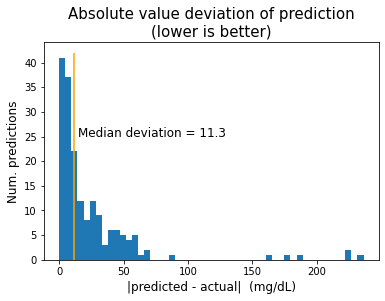

In [107]:
plt.hist(rfr_scores*-1, bins=50);
plt.title('Absolute value deviation of prediction\n(lower is better)', fontsize=15)
plt.xlabel('|predicted - actual|  (mg/dL)', fontsize=12)
plt.ylabel('Num. predictions', fontsize=12)
plt.vlines(x=11.3, ymin=0, ymax=42, color='orange')
plt.annotate('Median deviation = 11.3', xy=(15, 25), fontsize=12)
plt.savefig(r'..\reports\figures\3-5-2\RF_regressor_abs_deviation.png', bbox_inches='tight')